In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

path = "aqi.csv"
import warnings

warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv(path)
data.head()

,Time,City,Position,AQI,Level,PM2_5,PM10,CO,NO2,O3,SO2
0,2014-04-11 15:00:00,上海,普陀,86.0,良,59.0,101.0,0.000,0.0,0.0,0.0
1,2014-04-11 15:00:00,上海,十五厂,82.0,良,62.0,94.0,0.479,53.0,124.0,9.0
2,2014-04-11 15:00:00,上海,虹口,90.0,良,69.0,98.0,0.612,52.0,115.0,11.0
3,2014-04-11 15:00:00,上海,徐汇上师大,84.0,良,64.0,87.0,0.706,43.0,113.0,14.0
4,2014-04-11 15:00:00,上海,杨浦四漂,94.0,良,72.0,99.0,0.456,43.0,82.0,9.0


In [3]:
data["City"].value_counts()

天津    134484
北京    110011
上海     92755
Name: City, dtype: int64

In [4]:
data["Time"] = data["Time"].astype("datetime64")
data["Time"]

0        2014-04-11 15:00:00
1        2014-04-11 15:00:00
2        2014-04-11 15:00:00
3        2014-04-11 15:00:00
4        2014-04-11 15:00:00
                 ...        
337245   2015-06-22 01:00:00
337246   2015-06-22 01:00:00
337247   2015-06-22 01:00:00
337248   2015-06-22 01:00:00
337249   2015-06-22 01:00:00
Name: Time, Length: 337250, dtype: datetime64[ns]

In [5]:
data.groupby("Time")["City"].value_counts()

Time                 City
2014-04-11 15:00:00  天津      15
                     北京      12
                     上海      10
2014-04-13 07:00:00  天津      15
                     北京      12
                             ..
2015-06-22 00:00:00  北京      11
                     上海       9
2015-06-22 01:00:00  天津      13
                     北京      12
                     上海       9
Name: City, Length: 28530, dtype: int64

In [6]:
sh_data = data[data["City"] == "上海"]
sh_data

,Time,City,Position,AQI,Level,PM2_5,PM10,CO,NO2,O3,SO2
0,2014-04-11 15:00:00,上海,普陀,86.0,良,59.0,101.0,0.000,0.0,0.0,0.0
1,2014-04-11 15:00:00,上海,十五厂,82.0,良,62.0,94.0,0.479,53.0,124.0,9.0
2,2014-04-11 15:00:00,上海,虹口,90.0,良,69.0,98.0,0.612,52.0,115.0,11.0
3,2014-04-11 15:00:00,上海,徐汇上师大,84.0,良,64.0,87.0,0.706,43.0,113.0,14.0
4,2014-04-11 15:00:00,上海,杨浦四漂,94.0,良,72.0,99.0,0.456,43.0,82.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
92750,2015-06-22 01:00:00,上海,青浦淀山湖,44.0,优,30.0,0.0,0.735,3.0,107.0,7.0
92751,2015-06-22 01:00:00,上海,静安监测站,43.0,优,30.0,0.0,0.563,9.0,104.0,3.0
92752,2015-06-22 01:00:00,上海,浦东川沙,44.0,优,28.0,0.0,0.446,8.0,107.0,4.0
92753,2015-06-22 01:00:00,上海,浦东新区监测站,49.0,优,37.0,0.0,0.399,7.0,119.0,12.0


In [7]:
grouper = pd.Grouper(key="Time", freq="w")
res = sh_data.groupby(grouper).mean().applymap(lambda x: round(x, 2))
res

,AQI,PM2_5,PM10,CO,NO2,O3,SO2
Time,,,,,,,
2014-04-13,65.70,48.03,40.46,0.58,31.11,95.01,8.21
2014-04-20,94.29,71.08,46.64,0.71,40.53,65.02,13.87
2014-04-27,75.31,54.17,42.31,0.66,35.29,71.70,11.10
2014-05-04,100.24,73.16,84.50,0.79,44.53,66.52,20.30
2014-05-11,78.26,53.56,68.69,0.61,31.15,80.83,13.11
...,...,...,...,...,...,...,...
2015-05-31,62.93,44.56,38.10,0.59,29.23,82.29,9.66
2015-06-07,77.53,54.27,40.42,0.60,32.67,97.34,11.03
2015-06-14,85.93,61.16,74.55,0.79,45.71,78.04,16.29


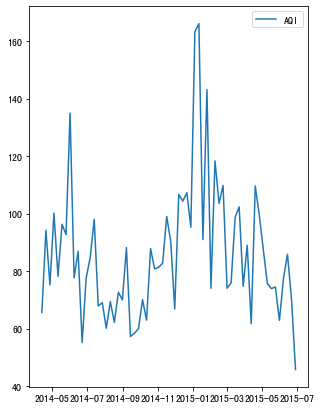

In [8]:
plt.figure(figsize=(5, 7))
plt.plot(res.index, res["AQI"], label="AQI")
plt.legend()
plt.show()

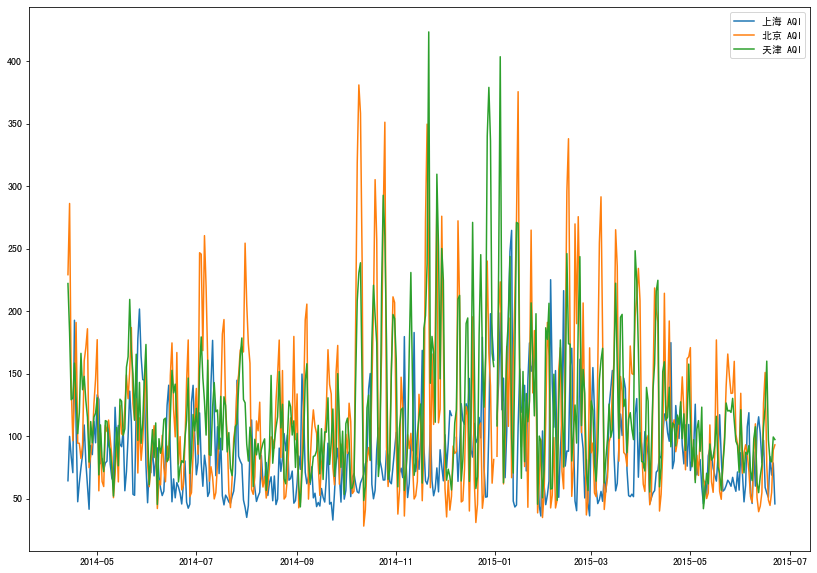

In [9]:
def show_matplotlib(data, sep="M", col="AQI", method="mean"):
    def transfrom(x):
        grouper = pd.Grouper(key="Time", freq=sep)
        return x.groupby(grouper)[col].agg(method)

    res = data.groupby("City").apply(transfrom).transpose()
    plt.figure(figsize=(14, 10))
    for i, c in enumerate(res):
        plt.plot(res.index, res[c], label=c + " " + col)
    plt.legend()
    plt.show()


show_matplotlib(data, sep="d", col="AQI", method="mean")

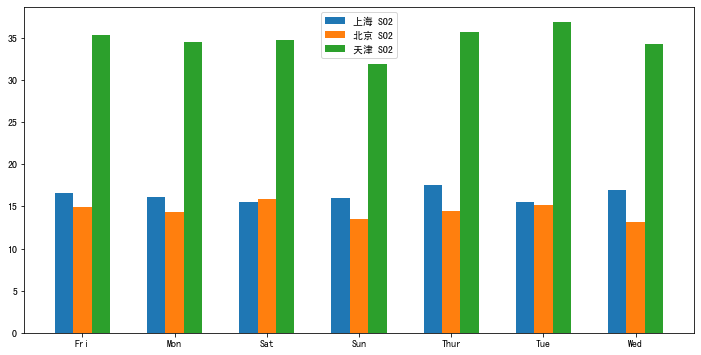

City,上海,北京,天津
week_day_name,,,
Fri,16.61,14.91,35.27
Mon,16.15,14.35,34.48
Sat,15.56,15.84,34.73
Sun,15.95,13.50,31.94
Thur,17.53,14.49,35.72
Tue,15.56,15.16,36.85
Wed,16.90,13.15,34.21


In [12]:
mapping = {
    0:'Mon',
    1:'Tue',
    2:'Wed',
    3:'Thur',
    4:'Fri',
    5:'Sat',
    6:'Sun',
}

def percity_weekday_col_show(x_df,col="SO2",method="mean"):
    def trans_weekday_func(x_df_sub):
        x_df_sub["week_day_name"] = x_df_sub.Time.dt.weekday.map(mapping)
        return x_df_sub.groupby("week_day_name")[col].agg(method).apply(lambda x: round(x,2))
    res = data.groupby("City").apply(trans_weekday_func).transpose()
    width = 0.2
    plt.figure(figsize=(12,6))
    for index,column_name in enumerate(res):
        plt.bar(np.arange((len(res.index)))+index*width,res[column_name],width=width,label=column_name+" "+col)
    plt.xticks(np.arange((len(res.index)))+ (width * (len(res.columns)-1))/2, res.index)
    plt.legend()
    plt.show()
    return res
percity_weekday_col_show(data)